# **Premiére partie**: <font size="4"> Nettoyage des données </font> 


## **1. Récapitulatif:**

> ### 1.1 Résumé données.
>> Nombre de lignes : 307511 <br>
>> Nombre de colonnes : 122 <br>
>> Pourcentage des valeurs null: 24% <br>    

## **2. Traitements:**

# I - Importations 

## I.1 - Importation des librairies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.preprocessing import Normalizer, StandardScaler

In [34]:
pd.set_option("display.max_rows", 130)
pd.set_option("display.max_columns", 130)
pd.set_option('max_colwidth', 150)

## 1.2 - Importation des données

In [35]:
data = pd.read_csv("../Data/application_train.csv")

In [36]:
#target = data.pop("TARGET") 
X_data = data.copy()

# II - Analyse préliminaire

In [37]:
X_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
X_data.info(verbose=1, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

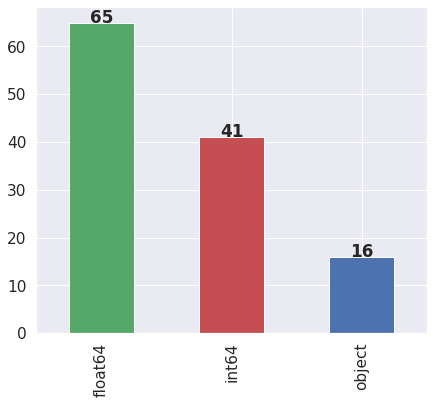

In [75]:
# Distribution des types de colonnes dans le dataset
plots = X_data.dtypes.value_counts().plot(kind="bar", figsize=(7, 6), color=["g", "r", "b"])
for plot in plots.patches:
    bl = plot.get_xy()
    x = 0.5*plot.get_width() + bl[0]
    y = plot.get_height() + bl[1] 
    plots.text(x,y,(plot.get_height()),
            ha='center', weight = 'bold')
plt.show()

In [38]:
# Describe des colonnes categoriques
X_data.describe(include=["O"])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [89]:
for col in X_data.select_dtypes('O'):
    print(col)
    print("-"*len(col))
    print(f"Nombre de catégories :{X_data[col].nunique()}")
    print(X_data[col].unique())
    print("="*100,"\n")

NAME_CONTRACT_TYPE
------------------
Nombre de catégories :2
['Cash loans' 'Revolving loans']

CODE_GENDER
-----------
Nombre de catégories :3
['M' 'F' 'XNA']

FLAG_OWN_CAR
------------
Nombre de catégories :2
['N' 'Y']

FLAG_OWN_REALTY
---------------
Nombre de catégories :2
['Y' 'N']

NAME_TYPE_SUITE
---------------
Nombre de catégories :7
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE
----------------
Nombre de catégories :8
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE
-------------------
Nombre de catégories :5
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
------------------
Nombre de catégories :6
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE
-----------------
Nombre de catégories

<span style="color:red">**Remarque:**</span>
La colonne CODE_GENDER contient une catégorie "XNA" non définie<br>
<span style="color:green">**Suggestion:**</span>
Changer la categorie "XNA" par np.nan 

In [62]:
# Describe des colonnes numeriques
X_data.describe(include=np.number)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

<span style="color:red">Remarque:</span>
Quelque colonnes ont un dtypes numerique alors qu'ils represente une classification binaire (0,1)

In [90]:
list_cat_binaire = []
for col in X_data.select_dtypes(np.number):
    if X_data[col].nunique() == 2:
        list_cat_binaire.append(col)

In [92]:
for col in X_data[list_cat_binaire]:
    print(col)
    print("-"*len(col))
    print(f"Nombre de catégories :{X_data[col].nunique()}")
    print(X_data[col].unique())
    print("="*100,"\n")

TARGET
------
Nombre de catégories :2
[1 0]

FLAG_MOBIL
----------
Nombre de catégories :2
[1 0]

FLAG_EMP_PHONE
--------------
Nombre de catégories :2
[1 0]

FLAG_WORK_PHONE
---------------
Nombre de catégories :2
[0 1]

FLAG_CONT_MOBILE
----------------
Nombre de catégories :2
[1 0]

FLAG_PHONE
----------
Nombre de catégories :2
[1 0]

FLAG_EMAIL
----------
Nombre de catégories :2
[0 1]

REG_REGION_NOT_LIVE_REGION
--------------------------
Nombre de catégories :2
[0 1]

REG_REGION_NOT_WORK_REGION
--------------------------
Nombre de catégories :2
[0 1]

LIVE_REGION_NOT_WORK_REGION
---------------------------
Nombre de catégories :2
[0 1]

REG_CITY_NOT_LIVE_CITY
----------------------
Nombre de catégories :2
[0 1]

REG_CITY_NOT_WORK_CITY
----------------------
Nombre de catégories :2
[0 1]

LIVE_CITY_NOT_WORK_CITY
-----------------------
Nombre de catégories :2
[0 1]

FLAG_DOCUMENT_2
---------------
Nombre de catégories :2
[0 1]

FLAG_DOCUMENT_3
---------------
Nombre de catégories :

<span style="color:green">**Suggestion**:</span>
Changer le type des colonnes de classification binaire en "object" 

In [7]:
# Détermination de la taille du dataset : nb de colonnes et de lignes
print(f"Nombre de colonnes dans le dataset est {X_data.shape[1]}")
print(f"Nombre de lignes dans le dataset est {X_data.shape[0]}")

Nombre de colonnes dans le dataset est 122
Nombre de lignes dans le dataset est 307511


In [8]:
sum_na = X_data.isna().sum().sum()
print(f"Pourcentage des valeurs manquates dans le dataset : {round(sum_na / (X_data.shape[0]*X_data.shape[1]), 2)*100}%")

Pourcentage des valeurs manquates dans le dataset : 24.0%


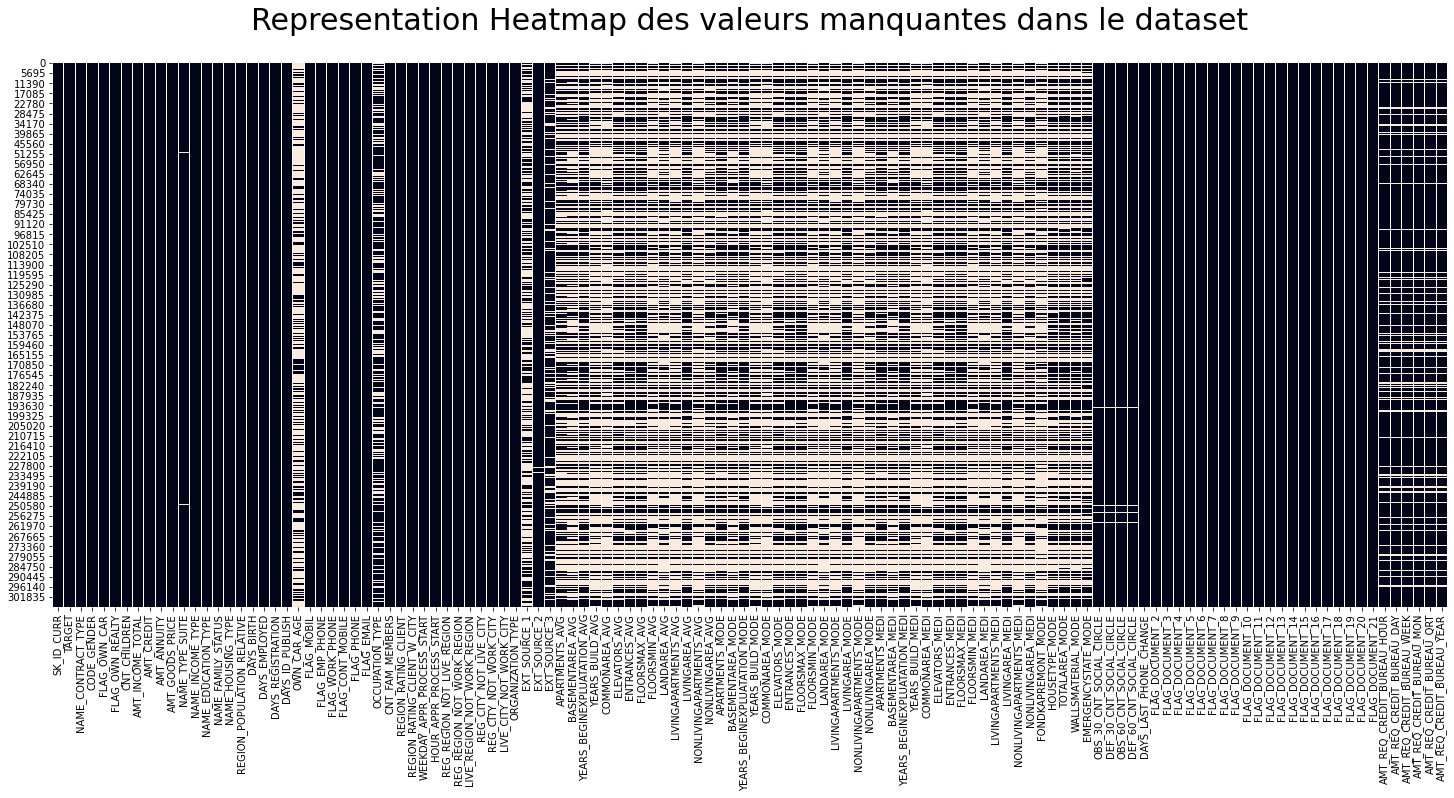

In [9]:
plt.figure(figsize=(25,10))
sns.heatmap(X_data.isna(), cbar=False)
plt.title("Representation Heatmap des valeurs manquantes dans le dataset", fontsize=30, y=1.05)
plt.show()

In [10]:
miss_data_rate = round(X_data.isna().sum() / X_data.shape[0],3).sort_values(ascending=False)
print("Pourcentage des valeurs manquantes par colonne")
miss_data_rate*100

Pourcentage des valeurs manquantes par colonne


COMMONAREA_MEDI                 69.9
COMMONAREA_AVG                  69.9
COMMONAREA_MODE                 69.9
NONLIVINGAPARTMENTS_MODE        69.4
NONLIVINGAPARTMENTS_AVG         69.4
NONLIVINGAPARTMENTS_MEDI        69.4
LIVINGAPARTMENTS_MODE           68.4
LIVINGAPARTMENTS_AVG            68.4
FONDKAPREMONT_MODE              68.4
LIVINGAPARTMENTS_MEDI           68.4
FLOORSMIN_AVG                   67.8
FLOORSMIN_MODE                  67.8
FLOORSMIN_MEDI                  67.8
YEARS_BUILD_MEDI                66.5
YEARS_BUILD_MODE                66.5
YEARS_BUILD_AVG                 66.5
OWN_CAR_AGE                     66.0
LANDAREA_MEDI                   59.4
LANDAREA_MODE                   59.4
LANDAREA_AVG                    59.4
BASEMENTAREA_MEDI               58.5
BASEMENTAREA_AVG                58.5
BASEMENTAREA_MODE               58.5
EXT_SOURCE_1                    56.4
NONLIVINGAREA_MODE              55.2
NONLIVINGAREA_AVG               55.2
NONLIVINGAREA_MEDI              55.2
E

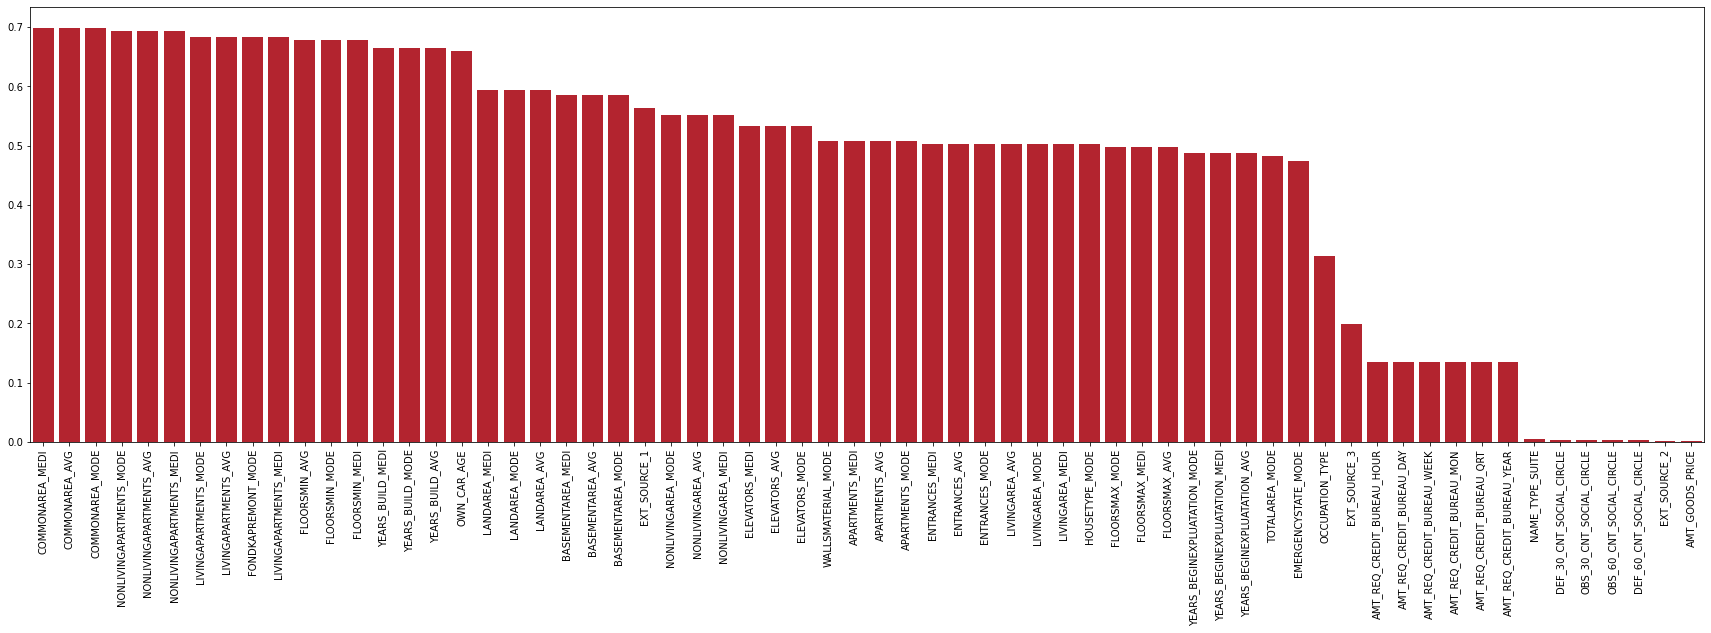

In [11]:
plt.figure(figsize=(30,8))
sns.barplot(x=miss_data_rate[miss_data_rate > 0].index, y=miss_data_rate[miss_data_rate > 0].values, color="#cb0c1b")
plt.xticks(rotation=90)
plt.show()

# III - Pré-Traitement: Nettoyage

## III.1 : Suppression des colonnes avec le plus de valeurs manquantes.

In [12]:
# Choix d'un pourcentage de 40% de valeurs manquantes
rate = 0.4

In [13]:
X_data = X_data[miss_data_rate[miss_data_rate < rate].index]

In [14]:
# pourcentage des valeurs manquantes total
X_data.isna().sum().sum() / X_data.size

0.018388873314833642

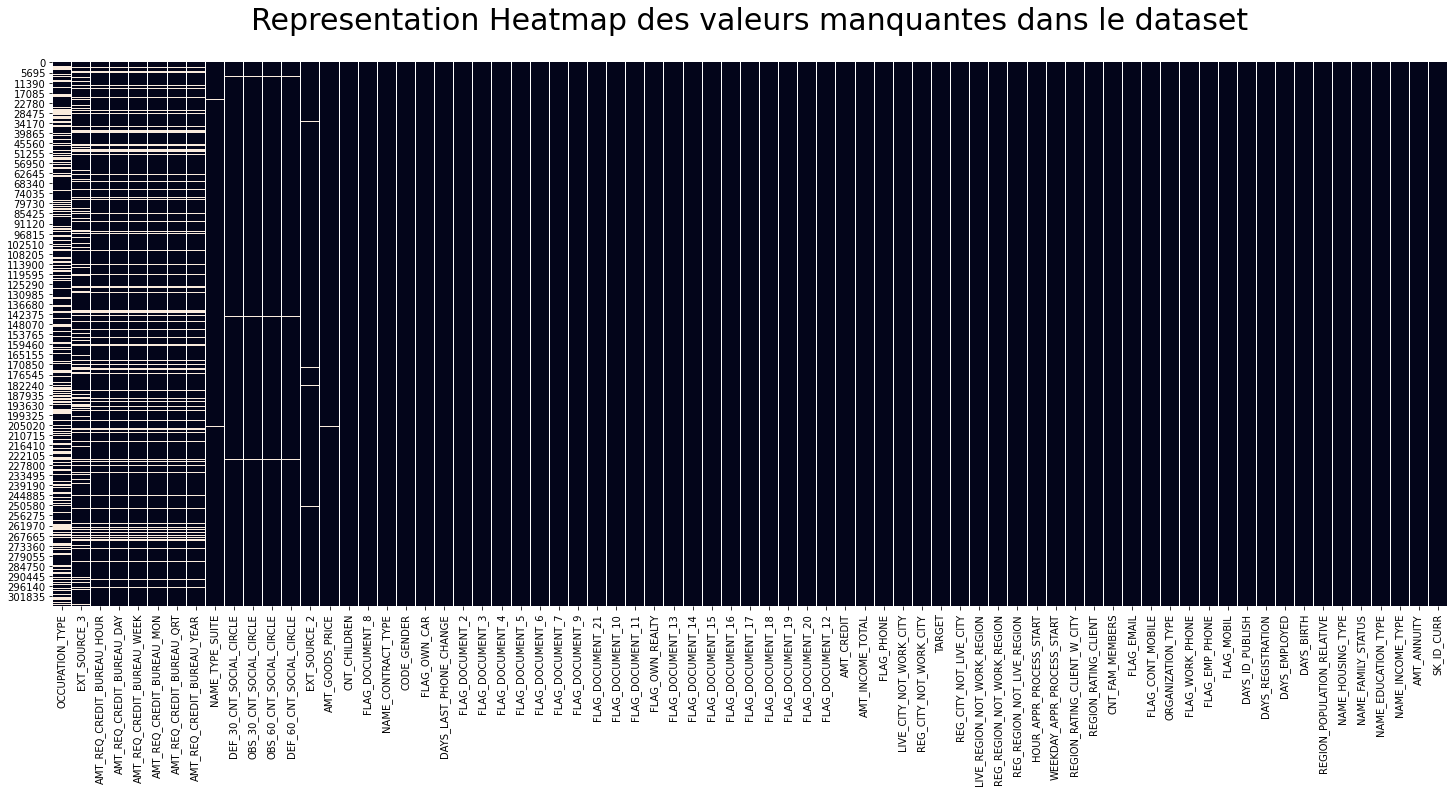

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(X_data.isna(), cbar=False)
plt.title("Representation Heatmap des valeurs manquantes dans le dataset", fontsize=30, y=1.05)
plt.show()

## III.2 - Suppression des Flag doc

In [16]:
flag_docs_col = [f"FLAG_DOCUMENT_{i}" for i in range(2,22)]

In [17]:
X_data.drop(flag_docs_col, axis=1, inplace=True)

In [16]:
X_data["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [17]:
X_data["AMT_REQ_CREDIT_BUREAU_WEEK"].isna().sum()

41519

In [18]:
amt_req_bur = X_data.columns[X_data.columns.str.contains("AMT_REQ_CREDIT_BUREAU")]

In [19]:
X_data[amt_req_bur].T.isna().all().sum()

41519

<AxesSubplot:>

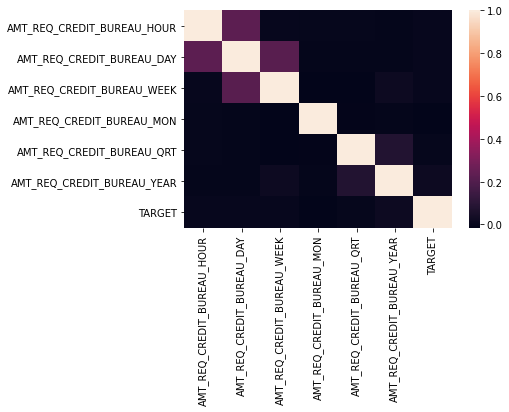

In [21]:
sns.heatmap(pd.concat([X_data[amt_req_bur], X_data.TARGET], axis=1).corr())

In [21]:
num_col = X_data.select_dtypes(np.number).columns

In [22]:
(X_data["EXT_SOURCE_3"].dropna().to_numpy()).reshape((246546,1))

array([[0.13937578],
       [0.72956669],
       [0.62122634],
       ...,
       [0.21885908],
       [0.66102354],
       [0.1139224 ]])

In [23]:
std_df = pd.DataFrame(StandardScaler().fit_transform(X_data[num_col]), columns=num_col)

In [24]:
std_df.describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_ANNUITY,SK_ID_CURR
count,2.465460e+05,2.659920e+05,2.659920e+05,2.659920e+05,2.659920e+05,2.659920e+05,2.659920e+05,3.064900e+05,3.064900e+05,3.064900e+05,...,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.074990e+05,3.075110e+05
mean,-8.598755e-16,-1.605826e-15,7.883288e-15,1.121138e-14,1.825531e-15,-2.952771e-15,3.974764e-15,1.260669e-15,-4.989284e-16,1.918629e-17,...,-9.642254e-16,-3.102083e-15,2.917601e-14,7.987038e-17,-5.944310e-18,-2.784011e-16,3.710928e-17,1.936947e-16,-1.777085e-17,-4.019342e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.619150e+00,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,-1.016414e+00,-3.210687e-01,-5.923592e-01,-5.905087e-01,...,-4.990131e-01,-2.133575e+00,-5.545358e+02,-2.784328e+00,-5.588007e+00,-5.784940e-01,-2.106335e+00,-1.487798e+00,-1.758906e+00,-1.733423e+00
25%,-7.195669e-01,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,-1.016414e+00,-3.210687e-01,-5.923592e-01,-5.905087e-01,...,-4.990131e-01,4.686969e-01,1.803310e-03,-8.644204e-01,-7.077673e-01,-4.712426e-01,-8.352476e-01,-7.853308e-01,-7.302872e-01,-8.661836e-01
50%,1.253482e-01,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,-4.814522e-01,-3.210687e-01,-5.923592e-01,-5.905087e-01,...,-4.990131e-01,4.686969e-01,1.803310e-03,-1.721143e-01,1.368540e-01,-4.602923e-01,6.576450e-02,-1.459095e-01,-1.521745e-01,2.089836e-04
75%,8.119512e-01,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,5.884719e-01,-3.210687e-01,2.406323e-01,2.498983e-01,...,-4.990131e-01,4.686969e-01,1.803310e-03,8.441512e-01,8.447974e-01,-4.537519e-01,8.304332e-01,5.635704e-01,5.165982e-01,8.654730e-01
max,1.976744e+00,4.762846e+01,8.119562e+01,3.891667e+01,2.918404e+01,3.283586e+02,1.235764e+01,7.579305e+01,1.443482e+02,1.439595e+02,...,2.003956e+00,4.686969e-01,1.803310e-03,1.983641e+00,1.415353e+00,2.133617e+00,1.958761e+00,3.733564e+00,1.593221e+01,1.732410e+00


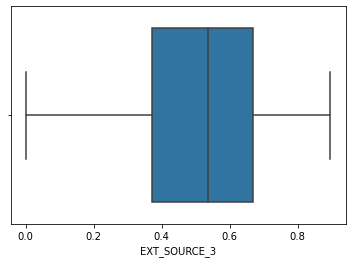

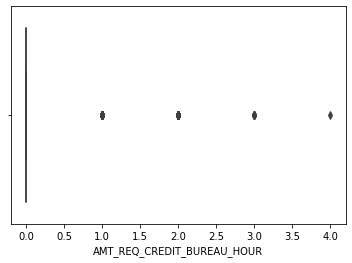

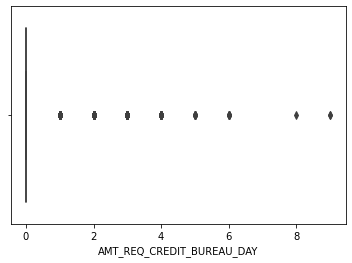

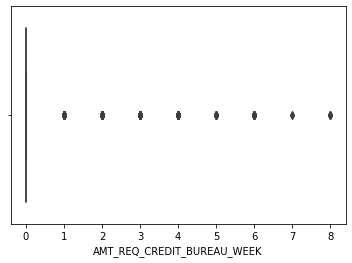

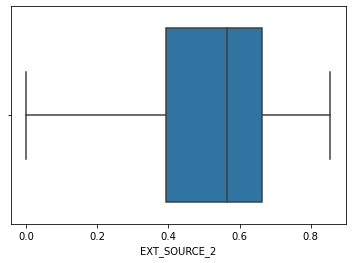

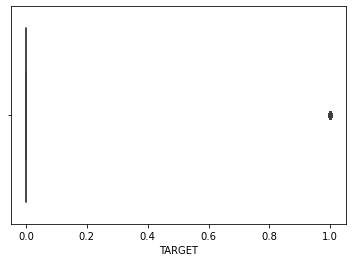

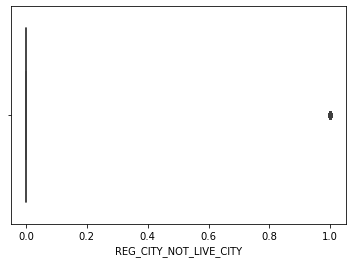

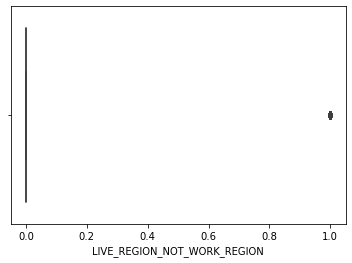

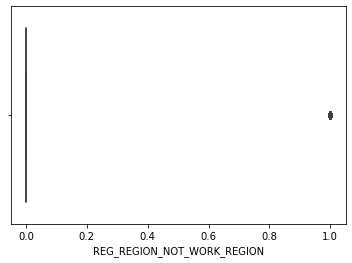

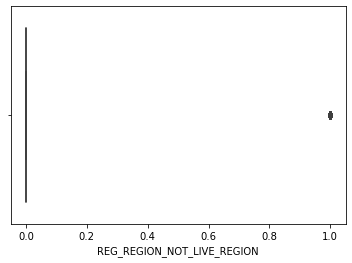

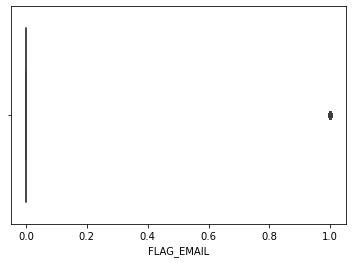

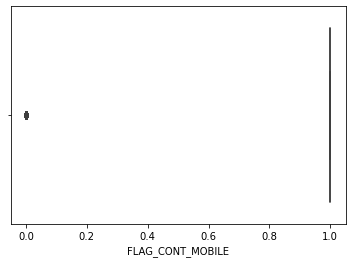

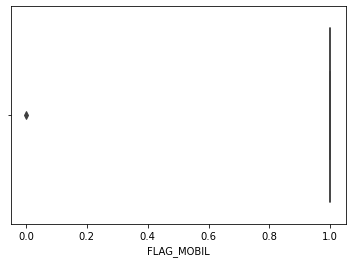

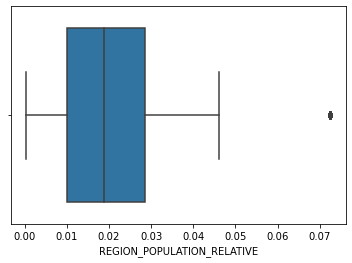

In [26]:
col_under_var = []
for col in X_data[X_data[num_col].columns[X_data[num_col].var() < 0.1]]:
    sns.boxplot(x=X_data[col])
    col_under_var.append(col)
    plt.show()

### Suppression des colonnes avec moins de 0.1 de variance à l'exception de REGION_POPULATION_RELATIVE et EXT_SOURCE_2 et EXT_SOURCE_3

In [27]:
col_to_drop_var = ['AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY',
                   'REG_CITY_NOT_LIVE_CITY',
                   'LIVE_REGION_NOT_WORK_REGION',
                   'REG_REGION_NOT_WORK_REGION',
                   'REG_REGION_NOT_LIVE_REGION',
                   'FLAG_EMAIL',
                   'FLAG_CONT_MOBILE',
                   'FLAG_MOBIL']

X_data.drop(col_to_drop_var, axis=1, inplace= True)

In [28]:
cat_col = X_data.select_dtypes("object").columns

In [29]:
for col in X_data[cat_col]:
    print(col)
    print(X_data[col].unique(), "\n")

OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff'] 

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans'] 

CODE_GENDER
['M' 'F' 'XNA'] 

FLAG_OWN_CAR
['N' 'Y'] 

FLAG_OWN_REALTY
['Y' 'N'] 

WEEKDAY_APPR_PROCESS_START
['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY'] 

ORGANIZATION_TYPE
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: 

## III. 3 Changer les valeurs "XNA" en np.nan

In [30]:
X_data.replace(["XNA", "Unknown"], np.nan, inplace=True)

In [31]:
for col in X_data[cat_col]:
    print(col)
    print(X_data[col].value_counts(dropna=False), "\n")

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE

In [ ]:
X_data.columns

### Suppression des NaN dans les colonnes GENDER et NAME_FAMILY_STATUE

In [32]:
X_data.dropna(subset=["CODE_GENDER", "NAME_FAMILY_STATUS"], inplace=True)

### Regrouper ORGANIZATION_TYPE

In [33]:
def func_drop_type(t):
    if "Type" in str(t):
        return t[:-7]
    elif "type" in str(t):
        return t.split(":")[0]
    else:
        return t

In [34]:
X_data["ORGANIZATION_TYPE"] = X_data.ORGANIZATION_TYPE.apply(func_drop_type)

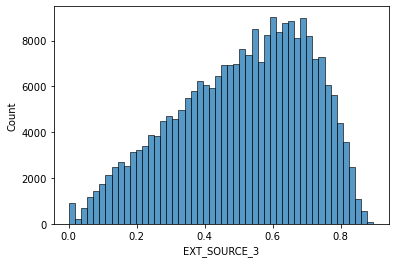

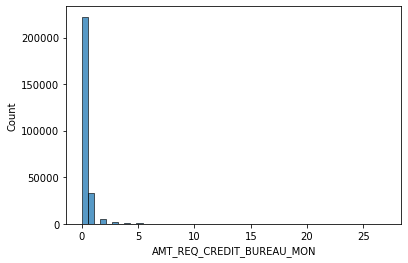

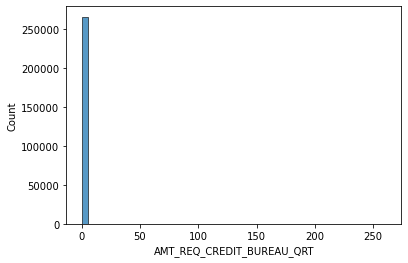

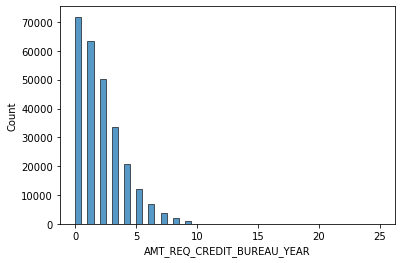

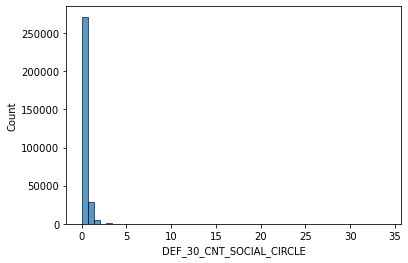

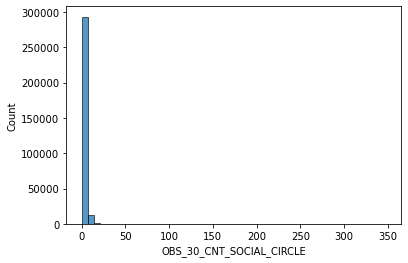

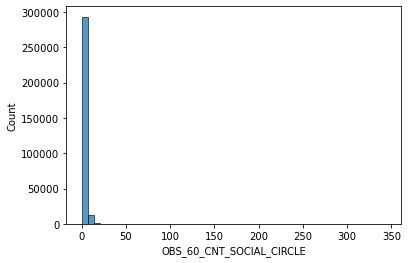

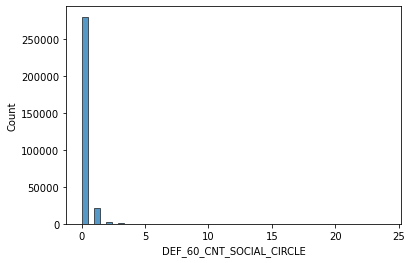

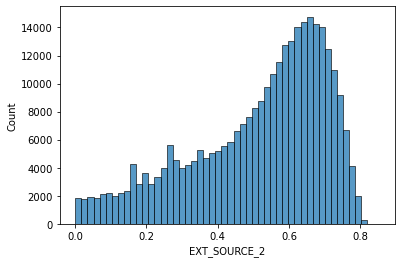

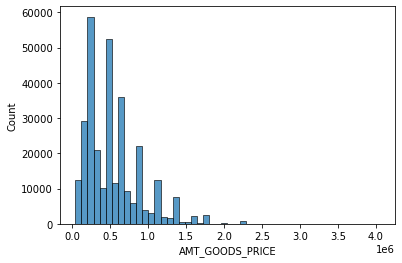

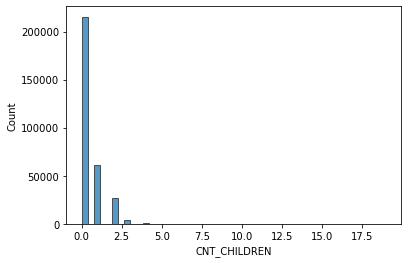

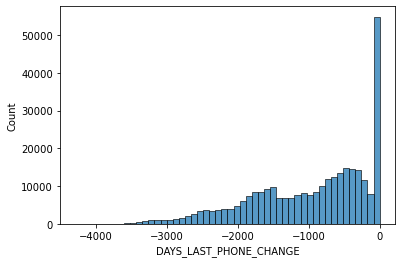

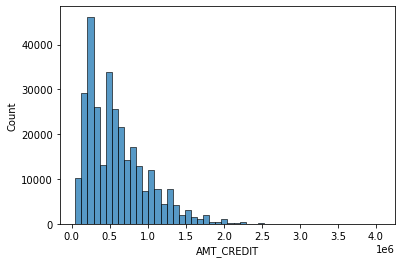

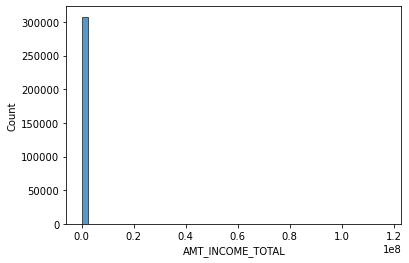

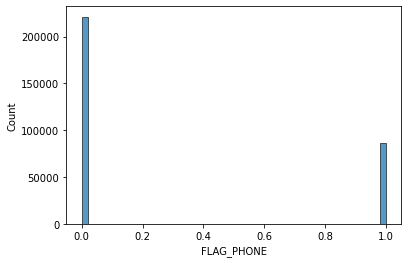

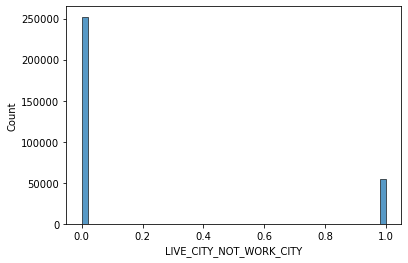

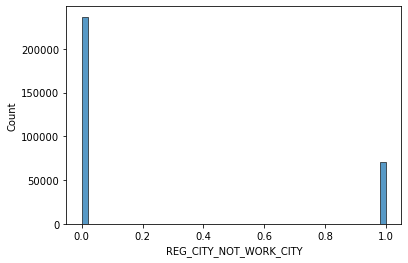

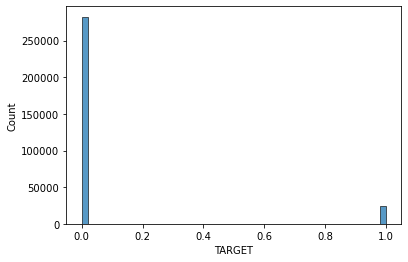

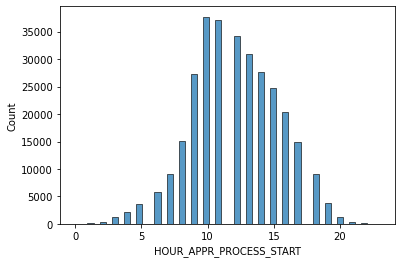

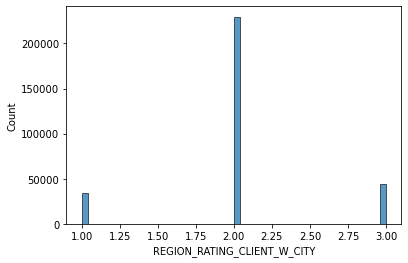

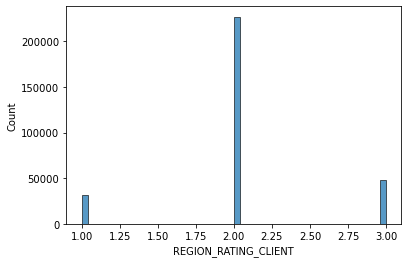

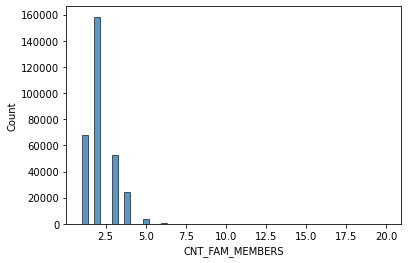

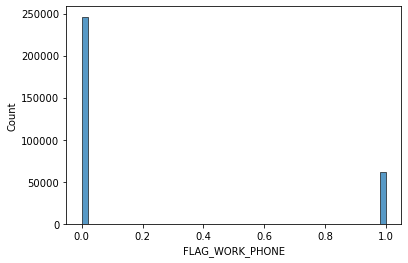

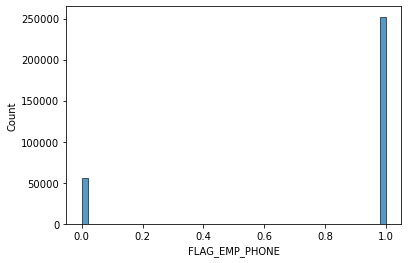

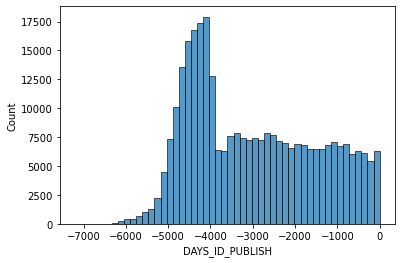

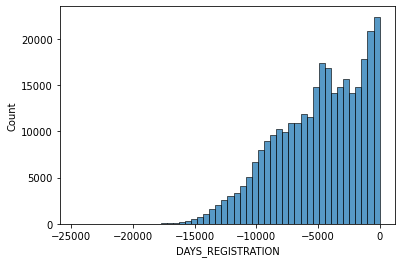

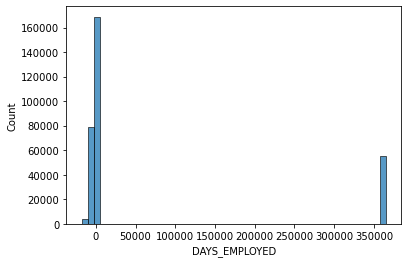

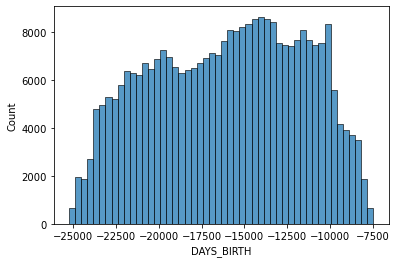

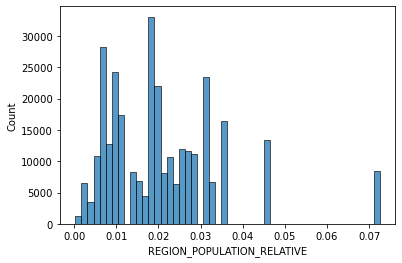

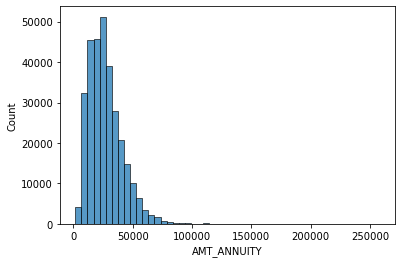

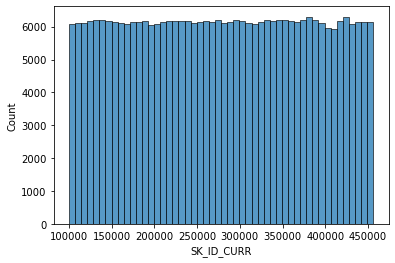

In [35]:
for col in X_data.select_dtypes(np.number):
    sns.histplot(x=X_data[col],bins=50)
    plt.show()

In [36]:
X_data.loc[(X_data.DAYS_EMPLOYED > 20000)]["DAYS_EMPLOYED"]

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [37]:
X_data.loc[(X_data.DAYS_EMPLOYED > 20000)]["OCCUPATION_TYPE"].value_counts(dropna=False,normalize=True)

NaN               0.999964
Cleaning staff    0.000036
Name: OCCUPATION_TYPE, dtype: float64

In [38]:
X_data.CODE_GENDER.value_counts(normalize=True)

F    0.658354
M    0.341646
Name: CODE_GENDER, dtype: float64

In [39]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307505 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OCCUPATION_TYPE              211116 non-null  object 
 1   EXT_SOURCE_3                 246541 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_MON    265987 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_QRT    265987 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_YEAR   265987 non-null  float64
 5   NAME_TYPE_SUITE              306215 non-null  object 
 6   DEF_30_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 8   OBS_60_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 10  EXT_SOURCE_2                 306845 non-null  float64
 11  AMT_GOODS_PRICE              307229 non-null  float64
 12  CNT_CHILDREN                 307505 non-null  int64  
 13 

### Supression des valeurs extremes

Suppression les individus avec des valeurs extremes dans la colonnes DAYS_EMPLOYED, ce qui va supprimer aussi une grandes partie des valeurs manquantes notemen dazns les colonnes ORGANIZATION_TYPE, OCCUPATION_TYPE

In [ ]:
# X_data = X_data.loc[(X_data.DAYS_EMPLOYED < 30000)]

<AxesSubplot:>

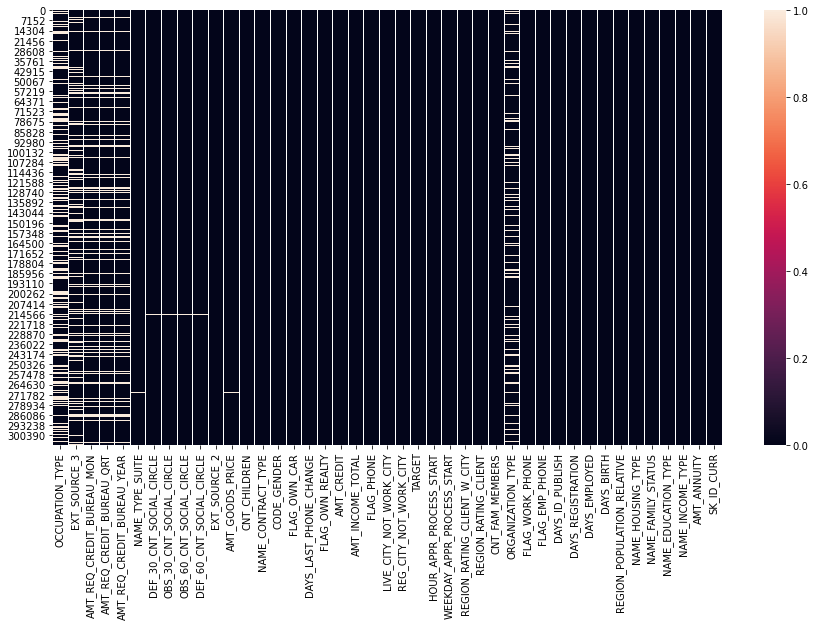

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

In [41]:
X_data.isna().sum()

OCCUPATION_TYPE                96389
EXT_SOURCE_3                   60964
AMT_REQ_CREDIT_BUREAU_MON      41518
AMT_REQ_CREDIT_BUREAU_QRT      41518
AMT_REQ_CREDIT_BUREAU_YEAR     41518
NAME_TYPE_SUITE                 1290
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  276
CNT_CHILDREN                       0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
DAYS_LAST_PHONE_CHANGE             1
FLAG_OWN_REALTY                    0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
FLAG_PHONE                         0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
TARGET                             0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
R

In [42]:
X_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1290
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [43]:
X_data.NAME_FAMILY_STATUS.value_counts(dropna=False)

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

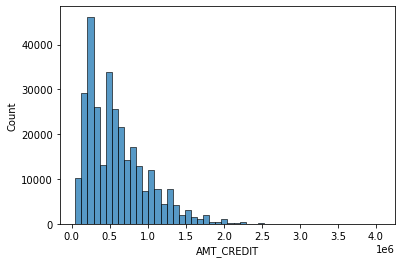

In [44]:
sns.histplot(X_data.AMT_CREDIT,bins=50)

In [45]:
X_data[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.986971
AMT_GOODS_PRICE,0.986971,1.000000


In [46]:
col_to_drop = ["AMT_GOODS_PRICE", 
               "DEF_60_CNT_SOCIAL_CIRCLE", 
               "OBS_60_CNT_SOCIAL_CIRCLE", 
               "OBS_30_CNT_SOCIAL_CIRCLE", 
               "DEF_30_CNT_SOCIAL_CIRCLE",
               "AMT_REQ_CREDIT_BUREAU_YEAR",
               "AMT_REQ_CREDIT_BUREAU_QRT",
               "AMT_REQ_CREDIT_BUREAU_MON",
               "LIVE_CITY_NOT_WORK_CITY",
               "REGION_RATING_CLIENT_W_CITY",
               "CNT_FAM_MEMBERS"
              ]

In [47]:
X_data.drop(col_to_drop, axis=1, inplace=True)

<AxesSubplot:>

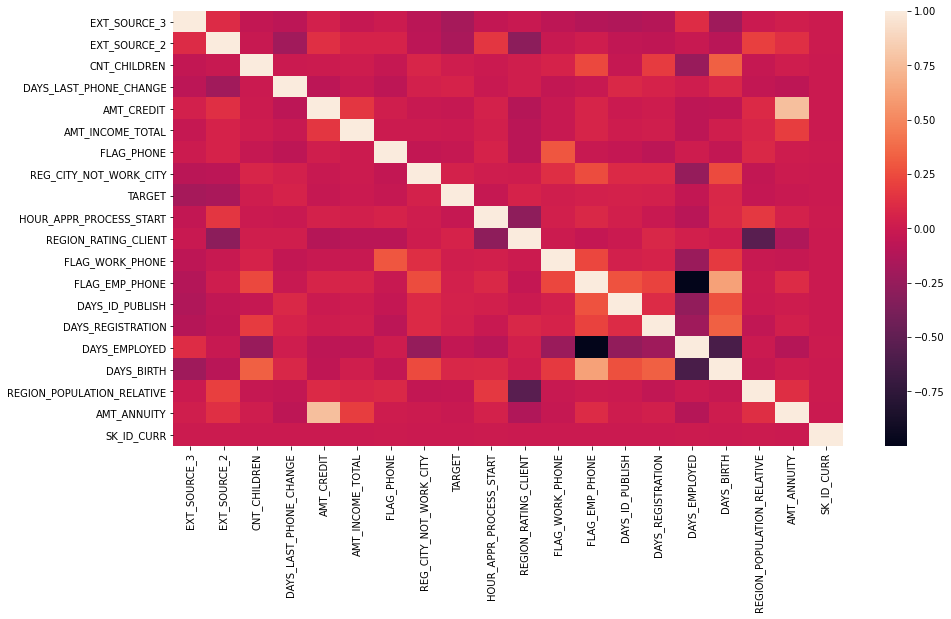

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.corr())

<AxesSubplot:>

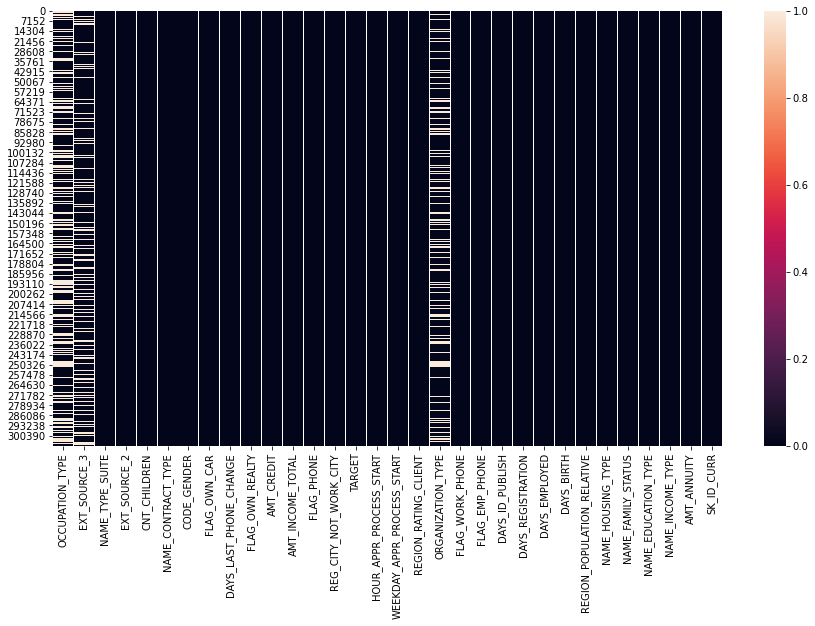

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

### Colonne NAME_TYPE_SUITE

In [50]:
X_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1290
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
X_data.NAME_TYPE_SUITE = X_data.NAME_TYPE_SUITE.replace(["Other_B", "Other_A", np.nan], value="Other")

In [52]:
X_data.isna().sum()

OCCUPATION_TYPE               96389
EXT_SOURCE_3                  60964
NAME_TYPE_SUITE                   0
EXT_SOURCE_2                    660
CNT_CHILDREN                      0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
DAYS_LAST_PHONE_CHANGE            1
FLAG_OWN_REALTY                   0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
FLAG_PHONE                        0
REG_CITY_NOT_WORK_CITY            0
TARGET                            0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE             55374
FLAG_WORK_PHONE                   0
FLAG_EMP_PHONE                    0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS          

<AxesSubplot:>

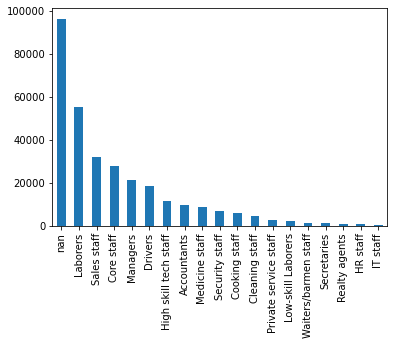

In [53]:
X_data.OCCUPATION_TYPE.value_counts(dropna=False).plot.bar()

In [54]:
def fill_NaNs_in_occupation_type(row):
    if pd.isnull(row['OCCUPATION_TYPE']):
        organization_type = row['ORGANIZATION_TYPE']
        return X_data[X_data['ORGANIZATION_TYPE']==organization_type].OCCUPATION_TYPE.value_counts().first_valid_index()
    else:
        return row['OCCUPATION_TYPE']

In [55]:
tqdm.pandas()

In [56]:
occupation_filled_nan = X_data.progress_apply(lambda row: fill_NaNs_in_occupation_type(row), axis=1)

100%|██████████| 307505/307505 [19:25<00:00, 263.81it/s]


<AxesSubplot:>

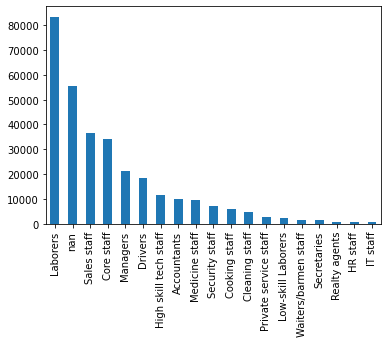

In [57]:
occupation_filled_nan.value_counts(dropna=False).plot.bar()

In [58]:
X_data.OCCUPATION_TYPE = occupation_filled_nan

In [59]:
ext_source_col = ["EXT_SOURCE_2", "EXT_SOURCE_3"]

In [60]:
X_data[ext_source_col] = X_data[ext_source_col].fillna(X_data[ext_source_col].median())

<AxesSubplot:>

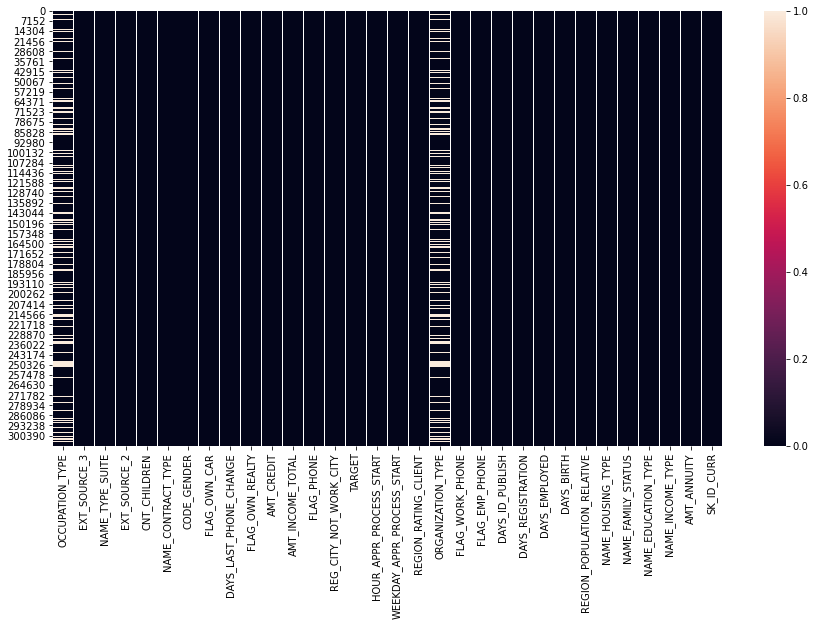

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

In [62]:
X_data.dropna(inplace=True)

In [ ]:
#target = target.loc[X_data.index]

In [ ]:
#X_data.to_csv("X_data.csv")
#target.to_csv("target.csv")

In [63]:
X_data['PROPORTION_LIFE_EMPLOYED'] = X_data['DAYS_EMPLOYED'] / X_data['DAYS_BIRTH']
X_data['INCOME_TO_CREDIT_RATIO'] = X_data['AMT_INCOME_TOTAL'] / X_data['AMT_CREDIT'] 
X_data['INCOME_TO_ANNUITY_RATIO'] = X_data['AMT_INCOME_TOTAL'] / X_data['AMT_ANNUITY']

In [65]:
X_data.to_csv("data.csv")

In [64]:
X_data.head()

,OCCUPATION_TYPE,EXT_SOURCE_3,NAME_TYPE_SUITE,EXT_SOURCE_2,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_REALTY,...,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR,PROPORTION_LIFE_EMPLOYED,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO
0,Laborers,0.139376,Unaccompanied,0.262949,0,Cash loans,M,N,-1134.0,Y,...,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002,0.067329,0.498036,8.198215
1,Core staff,0.535276,Family,0.622246,0,Cash loans,F,N,-828.0,N,...,0.003541,House / apartment,Married,Higher education,State servant,35698.5,100003,0.070862,0.208736,7.563343
2,Laborers,0.729567,Unaccompanied,0.555912,0,Revolving loans,M,Y,-815.0,Y,...,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004,0.011814,0.500000,10.000000
3,Laborers,0.535276,Unaccompanied,0.650442,0,Cash loans,F,N,-617.0,Y,...,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,0.159905,0.431748,4.547522
4,Core staff,0.535276,Unaccompanied,0.322738,0,Cash loans,M,N,-1106.0,Y,...,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007,0.152418,0.236842,5.556699
